In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
df = pd.read_csv('diamonds_ideal.csv')

In [32]:
df.count

<bound method DataFrame.count of        carat    cut color clarity  depth  table  price     x     y     z
0       1.51  Ideal     G      IF   61.7   55.0  18806  7.37  7.41  4.56
1       2.07  Ideal     G     SI2   62.5   55.0  18804  8.20  8.13  5.11
2       2.15  Ideal     G     SI2   62.6   54.0  18791  8.29  8.35  5.21
3       2.05  Ideal     G     SI1   61.9   57.0  18787  8.10  8.16  5.03
4       1.60  Ideal     F     VS1   62.0   56.0  18780  7.47  7.52  4.65
...      ...    ...   ...     ...    ...    ...    ...   ...   ...   ...
21546   0.25  Ideal     H     SI1   62.8   54.0    357  4.05  4.07  2.55
21547   0.30  Ideal     I     SI2   62.0   54.0    348  4.31  4.34  2.68
21548   0.31  Ideal     J     SI2   62.2   54.0    344  4.35  4.37  2.71
21549   0.23  Ideal     J     VS1   62.8   56.0    340  3.93  3.90  2.46
21550   0.23  Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43

[21551 rows x 10 columns]>

In [33]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
1,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
2,2.15,Ideal,G,SI2,62.6,54.0,18791,8.29,8.35,5.21
3,2.05,Ideal,G,SI1,61.9,57.0,18787,8.10,8.16,5.03
4,1.60,Ideal,F,VS1,62.0,56.0,18780,7.47,7.52,4.65


In [34]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
21546,0.25,Ideal,H,SI1,62.8,54.0,357,4.05,4.07,2.55
21547,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
21548,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
21549,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
21550,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [35]:
df.shape

(21551, 10)

In [36]:
# FILTER DATA FRAME 
filter_df=df[(df['carat']>1.00) & (df['cut'] =='Ideal') & (df['price']>18500)]

In [ ]:
filter_df.count

In [38]:
# ALLOCATE ONLY COUPLE OF COLUMS TO ANOTHER DATAFRAME
linear_df=filter_df[['carat','price']] # METHOD 1
linear_df1 = filter_df.filter(['carat','price']) # METHOD 2 - USING filter
linear_df2 = filter_df.iloc[:,[0,6]] # METHOD 3 USING -iloc


In [39]:
linear_df2.count()

carat    33
price    33
dtype: int64

In [40]:
X = linear_df.iloc[:, :-1].values
y = linear_df.iloc[:, -1].values

In [ ]:
X

In [ ]:
y

Splitting the dataset into the Training Set and Test Set

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [44]:
len(X_train)

23

In [45]:
len(y_train)

23

In [46]:
len(X_test)

10

In [47]:
len(y_test)

10

Training the Simple Linear Regression Model on the Training Set

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predicting the Test Set Result

In [49]:
y_pred = regressor.predict(X_test)

In [50]:
y_pred

array([18676.28268152, 18667.5606454 , 18705.35613525, 18676.28268152,
       18662.71506978, 18674.34445127, 18716.01640161, 18733.46047385,
       18676.28268152, 18641.39453705])

In [51]:
y_test

array([18736, 18648, 18599, 18674, 18791, 18578, 18571, 18682, 18741,
       18508], dtype=int64)

In [53]:
X_test

array([[2.01],
       [2.1 ],
       [1.71],
       [2.01],
       [2.15],
       [2.03],
       [1.6 ],
       [1.42],
       [2.01],
       [2.37]])

In [54]:
regressor.predict(np.array([[4.1]]))

array([18473.73762055])

In [56]:
accuracy = regressor.score(X_test,y_test)
r2_score(y_test,y_pred)

-0.21595180624681998

In [57]:
accuracy

-0.21595180624681998

In [58]:
print(accuracy*100,'%')

-21.595180624681998 %


Visualising the Traning Set Results

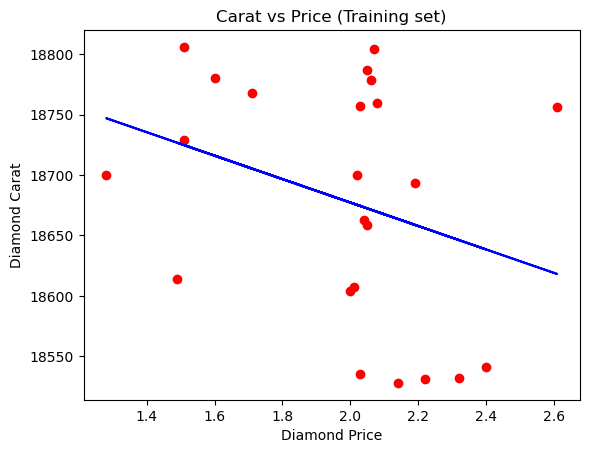

In [59]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Carat vs Price (Training set)')
plt.xlabel('Diamond Price')
plt.ylabel('Diamond Carat')
plt.show()

Visualising the Test set results

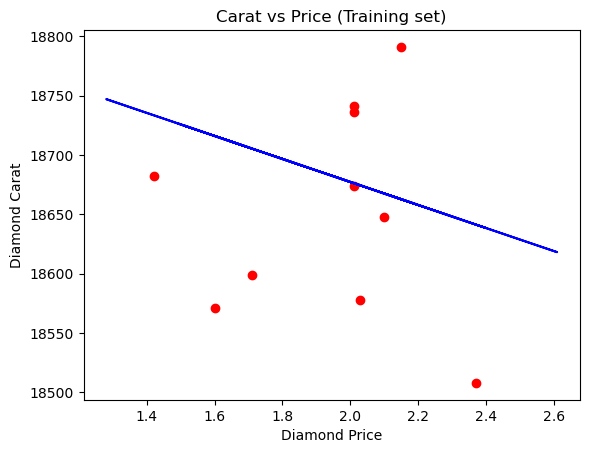

In [60]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Carat vs Price (Training set)')
plt.xlabel('Diamond Price')
plt.ylabel('Diamond Carat')
plt.show()

In [64]:
X_test1=np.array([[1.95],[3.75]])
X_test1

array([[1.95],
       [3.75]])

In [65]:
y_pred1 = regressor.predict(X_test1)
y_pred1

array([18682.09737226, 18507.6566499 ])